# Task 1. Weather

In [1]:
# Import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.signal import detrend
# Import data
weather = pd.read_csv("dailyweather.csv")
weather['Index'] = range(1, len(weather) + 1)

/var/folders/kq/0f1vjrnj2xn0q3t1270kq05r0000gn/T/ipykernel_31456/2477788843.py:3: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## 1. 
**Plot the time series in a sensible way**

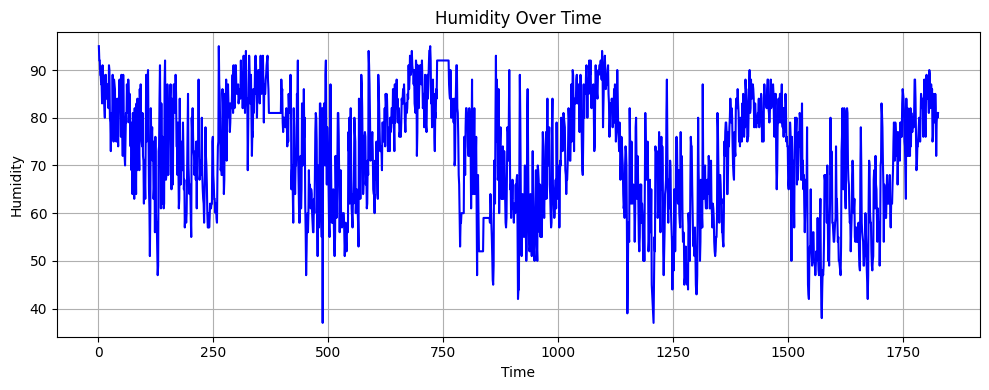

In [2]:
plt.figure(figsize=(10, 4))
plt.plot(weather['Index'], weather['Humidity'], color='blue')
plt.title('Humidity Over Time')
plt.xlabel('Time')
plt.ylabel('Humidity')
plt.grid(True)
plt.tight_layout()
plt.show()

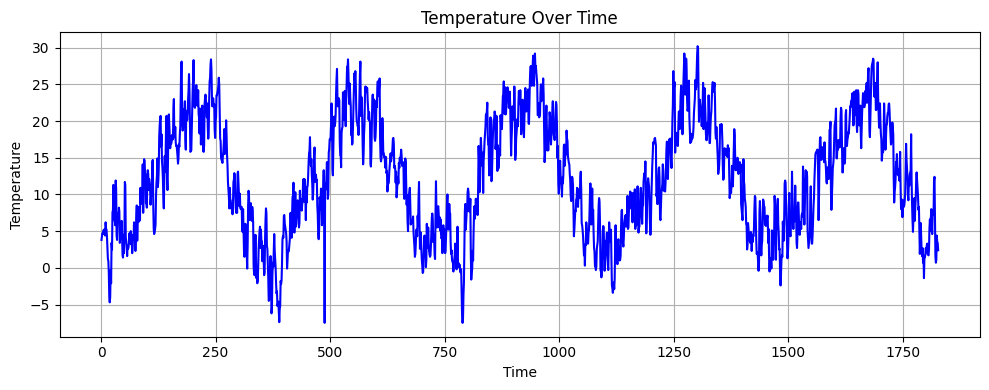

In [3]:
plt.figure(figsize=(10, 4))
plt.plot(weather['Index'], weather['Temperature'], color='blue')
plt.title('Temperature Over Time')
plt.xlabel('Time')
plt.ylabel('Temperature')
plt.grid(True)
plt.tight_layout()
plt.show()

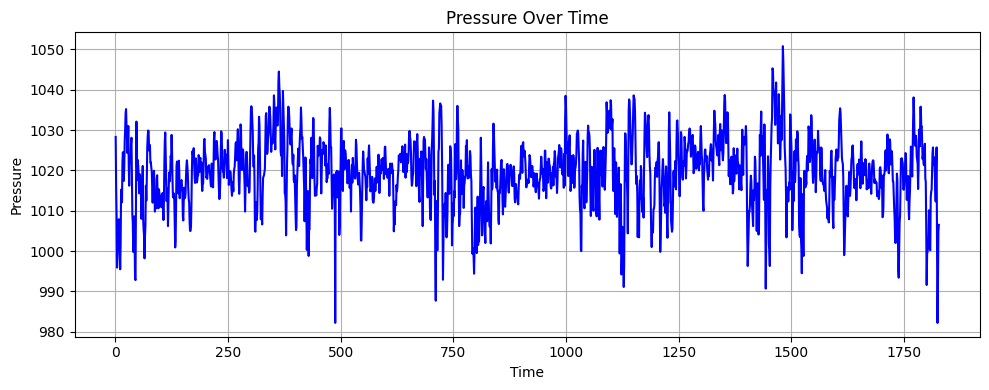

In [4]:
plt.figure(figsize=(10, 4))
plt.plot(weather['Index'], weather['Pressure'], color='blue')
plt.title('Pressure Over Time')
plt.xlabel('Time')
plt.ylabel('Pressure')
plt.grid(True)
plt.tight_layout()
plt.show()

## 2. 
**Visually inspect the plotted time series and describe whether you think any of them are correlated with each other. If you do, explain which ones and why, and how strong you think the correlation might be. Then calculate the actual correlations and compare them with your guesses. Were your predictions correct?**

There are clear periodical patternes in the plots of humidity and temperature, corresponding to the seasons of the year. The two are likely negatively correlated. Apart from the periodical patterns in the two plots, there seem to be a respectively slight upward and downward trend. It is harder to see any patterns in the plot of pressure. 

In [5]:
correlation_matrix = weather[['Temperature', 'Humidity', 'Pressure']].corr()
print(correlation_matrix)

             Temperature  Humidity  Pressure
Temperature     1.000000 -0.603413 -0.016089
Humidity       -0.603413  1.000000 -0.072740
Pressure       -0.016089 -0.072740  1.000000


As suspected there is a strong negative correlation between temperature and humidity. There is a very very small correlation between humidity and temperature and pressure and temperature. These small negative correlations could however also be insignificant. 

## 3. 
**Now we want to look at return-maps. Are you expecting a trend in the first return-map? How do you think the return-maps will differ for longer intervals like a month, 90 days, or a year? Discuss your expectations first, then create the plots to check.**

Especially for temperature and humidity I expect strong positive correlations for short lags. The previous measurements is very indicative of the next measurement. Since the pressure measurements exhibit less strong patterns, I expect the return maps to have less of a trend. As the lag increases the previous measurement is of course less indicative of the next. Perhaps we will however see strong correlations again when the lag is an entire year.  

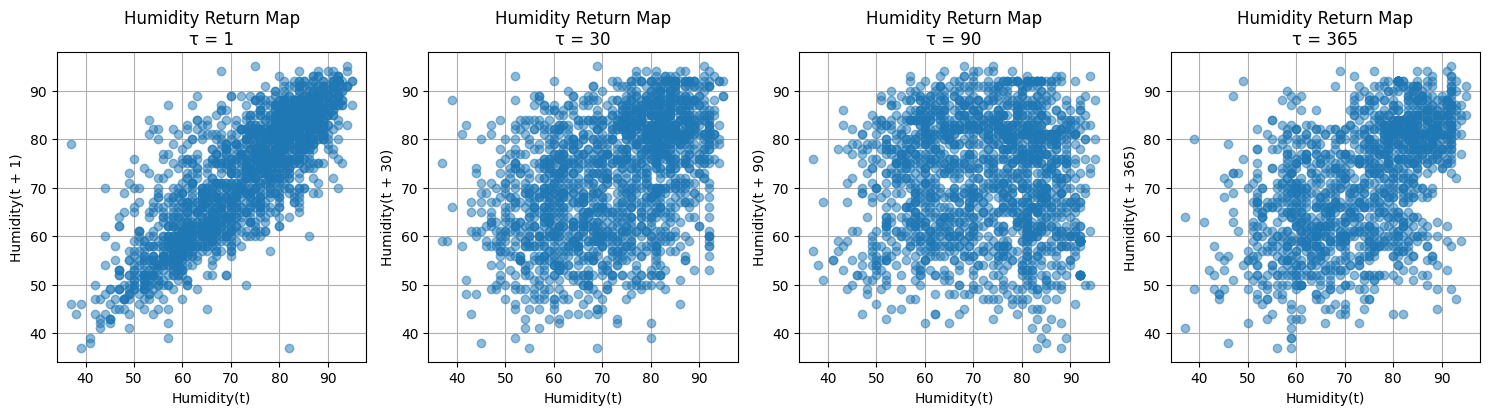

In [6]:
variable = 'Humidity'    
taus = [1, 30, 90, 365]      

# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

for ax, tau in zip(axes, taus):
    x = weather[variable].values[:-tau]
    y = weather[variable].values[tau:]
    
    ax.plot(x, y, 'o', alpha=0.5)
    ax.set_title(f'{variable} Return Map\nτ = {tau}')
    ax.set_xlabel(f'{variable}(t)')
    ax.set_ylabel(f'{variable}(t + {tau})')
    ax.grid(True)
    ax.set_aspect('equal')

plt.tight_layout()
plt.show()


As suspected we see a strong positive correlations between the day to day measurements, this correlation decreases as the time lag increases, but reappears again when the lag is an entire year.  

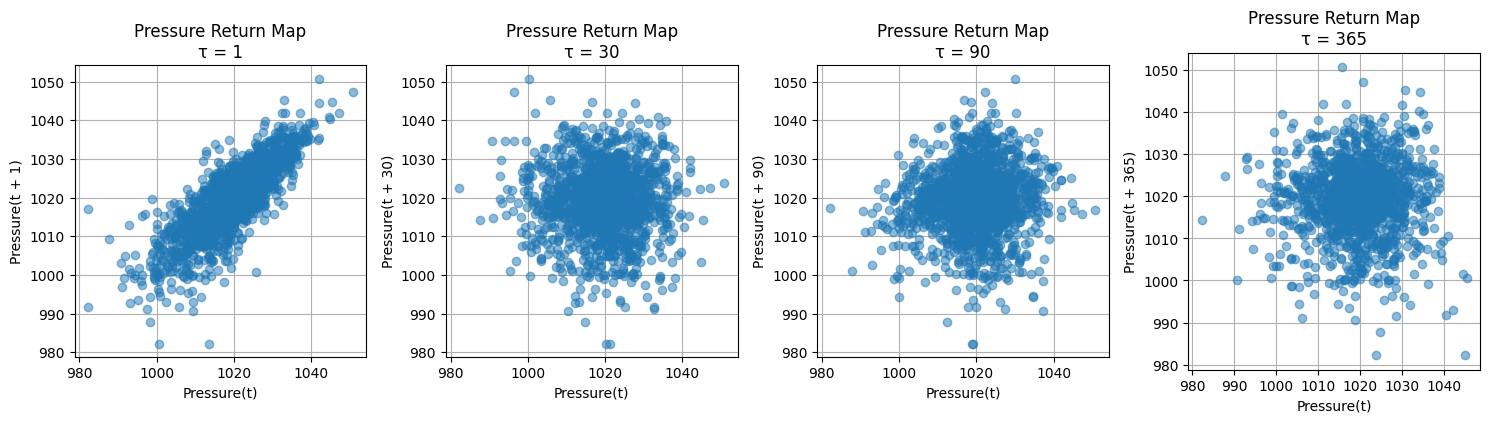

In [7]:
variable = 'Pressure'    
taus = [1, 30, 90, 365]      

# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

for ax, tau in zip(axes, taus):
    x = weather[variable].values[:-tau]
    y = weather[variable].values[tau:]
    
    ax.plot(x, y, 'o', alpha=0.5)
    ax.set_title(f'{variable} Return Map\nτ = {tau}')
    ax.set_xlabel(f'{variable}(t)')
    ax.set_ylabel(f'{variable}(t + {tau})')
    ax.grid(True)
    ax.set_aspect('equal')

plt.tight_layout()
plt.show()


There is actually a very strong positive correlation between the day to day measurements. But this correlation is completely gone as the lag increases. 

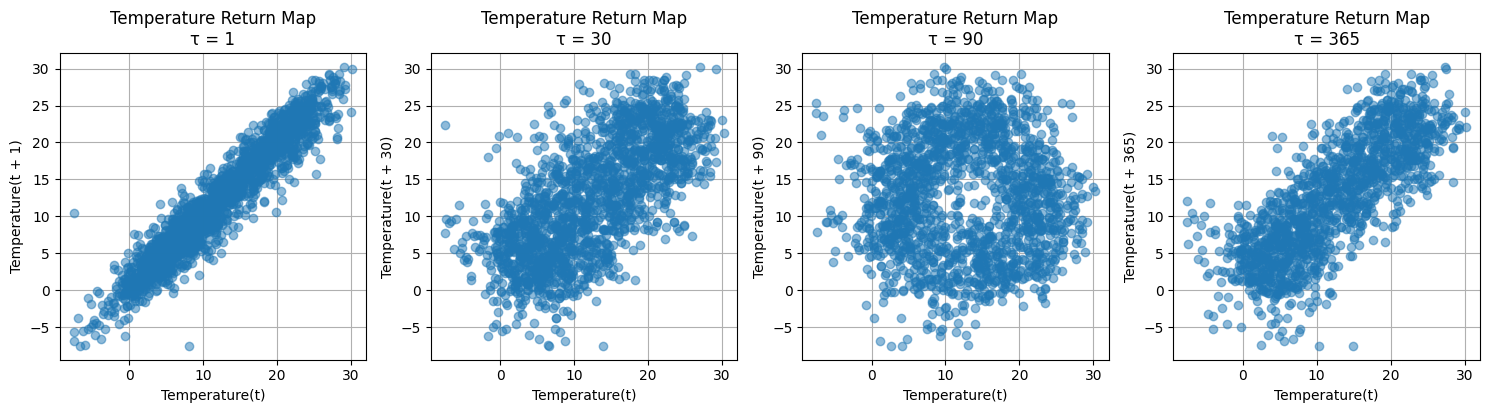

In [8]:
variable = 'Temperature'    
taus = [1, 30, 90, 365]      

# Create subplots
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

for ax, tau in zip(axes, taus):
    x = weather[variable].values[:-tau]
    y = weather[variable].values[tau:]
    
    ax.plot(x, y, 'o', alpha=0.5)
    ax.set_title(f'{variable} Return Map\nτ = {tau}')
    ax.set_xlabel(f'{variable}(t)')
    ax.set_ylabel(f'{variable}(t + {tau})')
    ax.grid(True)
    ax.set_aspect('equal')

plt.tight_layout()
plt.show()

There is very strong day to day, month to month, and year to year correlation. The three month plot is quite interesting, it shows that when the temperature is around 10 degrees the temperature in three months will either be very high or very low. 

## 4. 
**Do you notice a trend in the temperature, e.g. can you observe the climate changing over time? What kind of analysis could help you confirm whether such a trend exists?**

I believe you can see a small trend of increasing temperature and decreasing humidity over time. Fitting a model to data and then conducting a hypothesis test? Maybe an auto regressive moving average model, but somehow taking into account the periodicity of the measurements. 

# Task 2. Detrending and autocorrelation

In [9]:
investment = pd.read_excel("investment.xls")

## 1. 
**First, we want to remove the overall trend from the time series. Should you rather use the model (I) or (II), for the expected linear trend? Explain. Now remove the trend from the dataset using linear regression.**

The difference between models (I) and (II) are that one of them contains an intercept. So the question is whether we want or data to be centered around zero or are fine with it having a mean different from 0. We will choose model (II) as the definition of white noise presented in class had mean 0. 

We remove the linear trend using the detrend function from scipy.signal. 

In [10]:
detrended_investment = detrend(investment['investment'])


Below we plot the original data

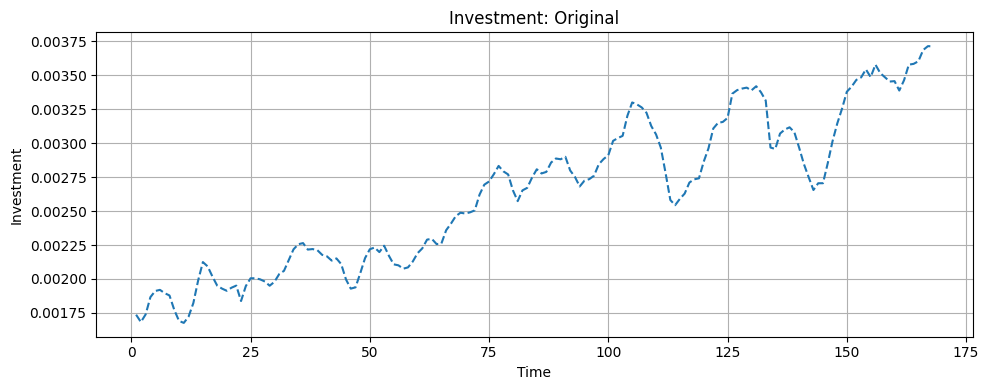

In [11]:
plt.figure(figsize=(10, 4))
plt.plot(range(1,investment.shape[0] + 1), investment, linestyle='--')
plt.title('Investment: Original')
plt.xlabel('Time')
plt.ylabel('Investment')
plt.grid(True)
plt.tight_layout()
plt.show()

Below we plot the detrended data

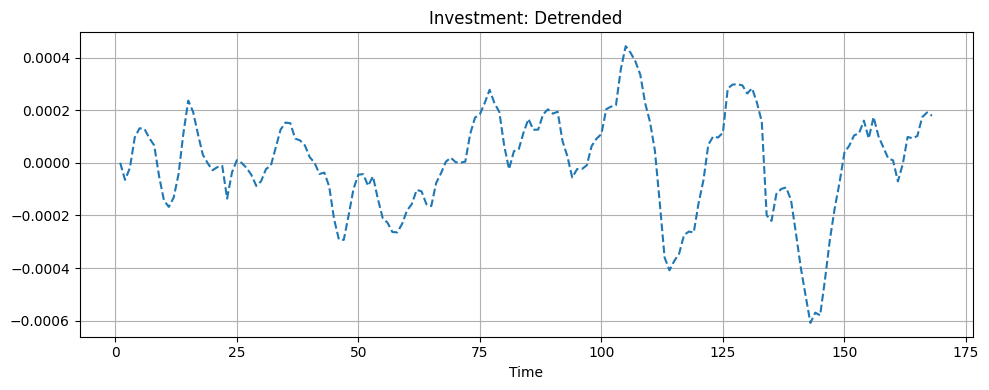

In [12]:
plt.figure(figsize=(10, 4))
plt.plot(range(1,investment.shape[0] + 1), detrended_investment, linestyle='--')
plt.title('Investment: Detrended')
plt.xlabel('Time')
plt.grid(True)
plt.tight_layout()
plt.show()

## 2. 
**(a) Write down the definitions for weak and strong stationarity.**

We say that a time series $\{x_t\}$ is weakly stationary if
$$ E(x_t) = \mu \quad , \quad \forall t = 1,...,T$$
For some $\mu \in \mathbb{R}$, and 
$$acov(x_t, x_{t + \Delta t}) = acov(\Delta t) \quad , \quad \forall t = 1,...,T$$
Let $F(x_{t_1},...,x_{t_n})$ denote the joint distribution function of the $x_t$ at times $t_1,...,t_n$, we say that the time series is strongly stationary if
$$F(x_{t_1},...,x_{t_n}) = F(x_{t_1 + \Delta t},...,x_{t_n+ \Delta t})$$
For all $\Delta t, t_1, t_n \geq 0$ and $n \in \mathbb{N}$.  


**(b) Examine (loosely) whether the time series with the linear trend removed is stationary (the implementation does not have to be perfect)? Is the time series (of the original series before regression) of first differences stationary (i.e. ${x_{t+1} − x_t}$)? How about the time series of second-order differences? (i.e. ${x_{t+2} − x_{t}}$)?**

From the plot of the detrended time series it seems as if the variance is increasing as the time is increasing. Furthermore there are some oscillations around the mean 0. It is however difficult to say whether these patterns are random or it is some trend.

If the time series is stationary the mean and variation of the time series over time should be $0$. We can investigate this assumption by taking the rolling average and rolling variancce of the time series. We choose to do this with a window of 50, that is we compute:
$$\hat{\mu}_k = \frac{1}{50} \sum_{i=1}^{50} x_{i+k}$$
and
$$\hat{\sigma}_k = \frac{1}{50} \sum_{i=1}^{50} (x_{i+k} - \hat{\mu}_k)^2$$
For $k=0,...,150$, and check whether $z_k$ is roughly constant. 

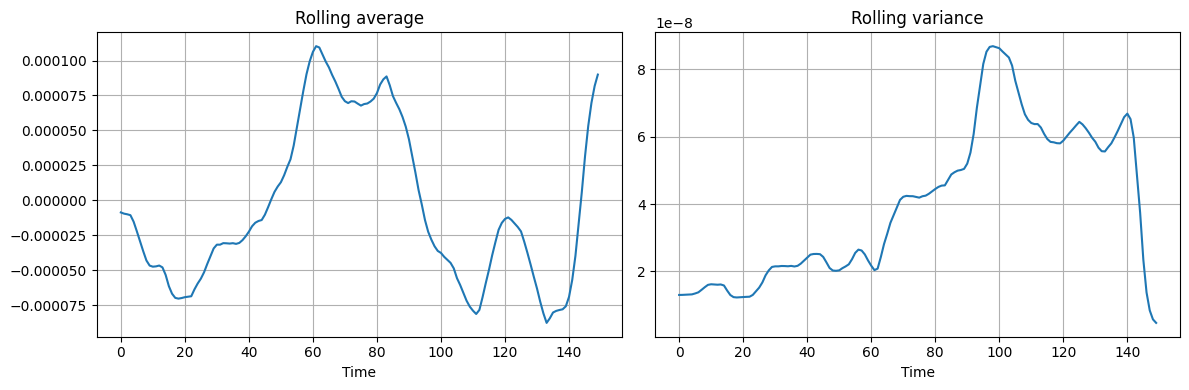

In [13]:
mu_hat = [0]*150
sigma_hat = [0]*150
for k in range(150):
    mu_hat[k] = np.mean(detrended_investment[(k):(k+50)])
    sigma_hat[k] = np.var(detrended_investment[(k):(k+50)])

fig, axs = plt.subplots(1, 2, figsize=(12, 4))  

# Plot rolling average
axs[0].plot(range(150), mu_hat)
axs[0].set_title('Rolling average')
axs[0].set_xlabel('Time')
axs[0].grid(True)

# Plot rolling variance
axs[1].plot(range(150), sigma_hat)
axs[1].set_title('Rolling variance')
axs[1].set_xlabel('Time')
axs[1].grid(True)

plt.tight_layout()
plt.show()

From the rolling average there is a bump in the middle, but this could be random. For the rolling variance the variance is increasing up to time 100-140, when it then suddenly drops. Again it is hard to say whether this is by chance or there is a trend. We now calculate the first and second differences 

In [14]:
diff1 = investment['investment'].values[1:] - investment['investment'].values[:-1]
diff2 = investment['investment'].values[2:] - investment['investment'].values[:-2]

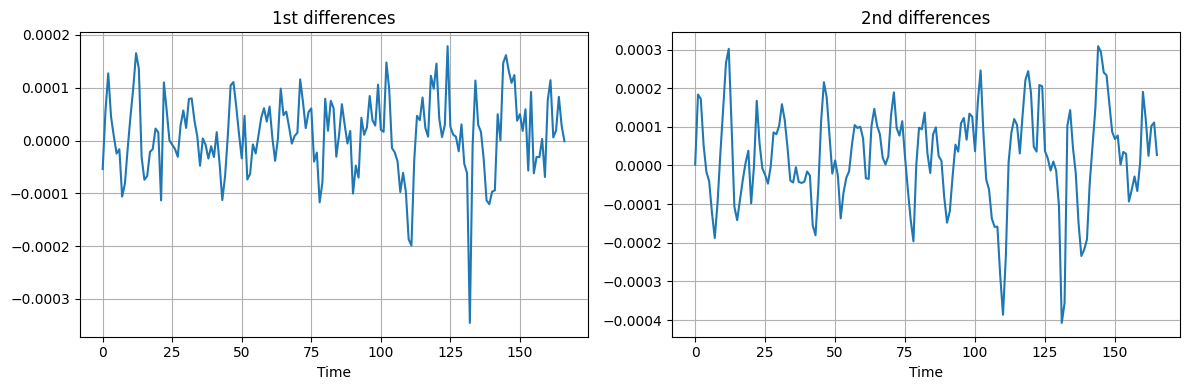

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))  

# Plot diff1
axs[0].plot(range(len(diff1)), diff1)
axs[0].set_title('1st differences')
axs[0].set_xlabel('Time')
axs[0].grid(True)

# Plot diff2
axs[1].plot(range(len(diff2)), diff2)
axs[1].set_title('2nd differences')
axs[1].set_xlabel('Time')
axs[1].grid(True)

plt.tight_layout()
plt.show()

They look roughly stationary...

## 3a)
**Implement a function to compute the autocorrelation of a time series from scratch yourself. While doing so, think about which parts of the theoretical formula are challenging to implement in practice. What assumptions do you need to make in order for your implementation to be valid?**

We implement the sample autocorrelation function from definition 1.14 in Schumway and Stoffer. The function takes as input a timeseries x and a lag dt.

In [16]:
def acorr(x, dt):
    mu = np.mean(x)
    sigma2 = np.var(x)
    return(np.mean((x[:-dt] - mu) * (x[(dt):] - mu))/(sigma2))

The difficulties with the theoretical formula given is that since we only have acces to a single time series, we have to assume that $\mu_t = \mu_{t+dt} = \frac{1}{T} \sum_{t=1}^T x_t$ and  $\sigma_t = \sigma_{t+dt}= \frac{1}{T} \sum_{t=1}^T (x_t- \mu)^2$. 

## 3b)
**Compute the autocorrelation function of the detrended time series. Can you find periodic business cycles (corresponding to peaks in the autocorrelation function)?**

In [17]:
acorr_detrend_invest = [acorr(detrended_investment, lag) for lag in range(1,(len(detrended_investment)-1))]

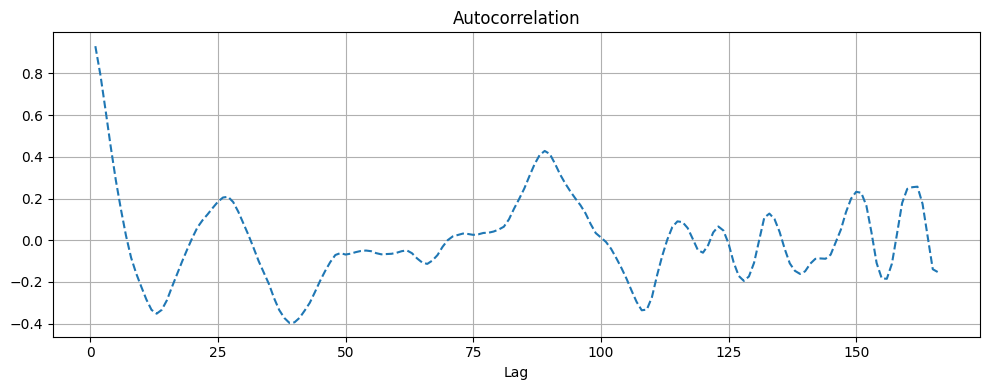

In [18]:
plt.figure(figsize=(10, 4))
plt.plot(range(1,(len(detrended_investment)-1)), acorr_detrend_invest, linestyle='--')
plt.title('Autocorrelation')
plt.xlabel('Lag')
plt.grid(True)
plt.tight_layout()
plt.show()

# Task 3. AR models

## 1. 
**Create your own AR time series of length T = 200 and order p = 4,**

In [19]:
T = 200
x = [0] * T

for i in range(len(x)):
    x[i] = -0.8 * x[i-1] + 0.4 * x[i-4] + np.random.normal(0,1,1)

## 2. 
**Plot the time series in time as well as the first return-map. What do you notice?**

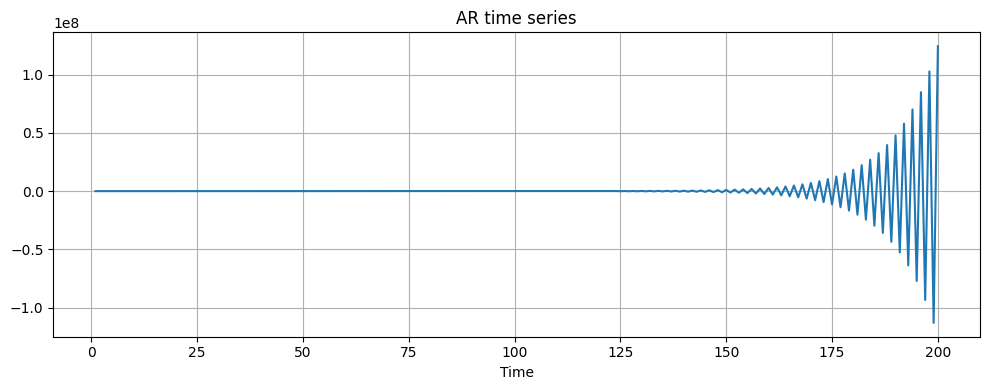

In [20]:
plt.figure(figsize=(10, 4))
plt.plot(range(1,len(x) + 1), x)
plt.title('AR time series')
plt.xlabel('Time')
plt.grid(True)
plt.tight_layout()
plt.show()

The values get larger and larger, and the time series is divergent, oscilating between numerically large positive and negative values. 

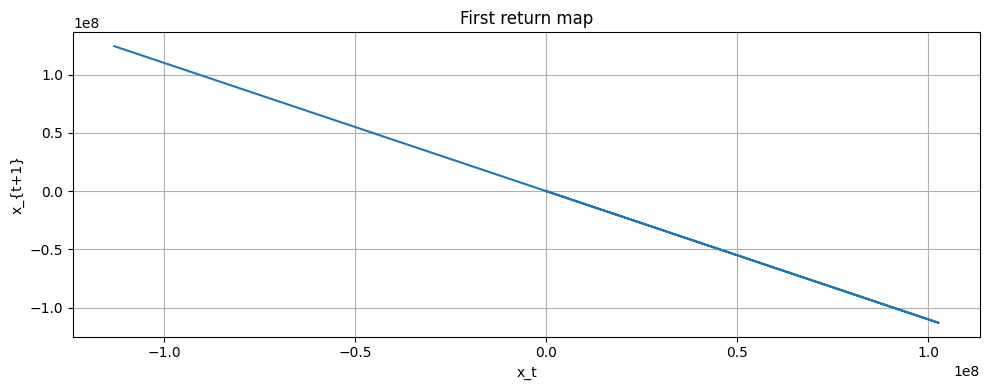

In [21]:
plt.figure(figsize=(10, 4))
plt.plot(x[:-1], x[1:])
plt.title('First return map')
plt.xlabel('x_t')
plt.ylabel('x_{t+1}')
plt.grid(True)
plt.tight_layout()
plt.show()

The time series is oscillating around a line with slope -0.8 which is the coefficient $a_1$. 